<a href="https://colab.research.google.com/github/EduardoMoraesRitter/Introducao-NLP-analise-sentimento/blob/master/classificar_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##classificar os texto

1.   ler uma base categorizada do IMDB no kaggle em portugues. https://www.kaggle.com/luisfredgs/imdb-ptbr

2.   Entender os dados depois verificar as classes se estao balanciadas

1.   Prepara e limpar os dados

2.   NLP - transforma texto em numeros:
  *   corpos textual todas as resenhas - criar um vocabulario(dicionario) 
  *   criando assim um vetro de palavras, sacola de palagras(bag of words "BOW"), cuidado com o numero de dimencoes.

1.   Separa base de teste e treino, com train_test_split

2.   Criar uma modelo de Regressao Logisitca e ver o score https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

1.   classificar os texto com regressao logistica

2.   visualizar com Word cloud é uma imagem gerada com palavras distribuídas em um espaço, de modo que o tamanho de cada palavra é proporcional à sua frequência de aparição nos dados.

1.   TOKENIZACAO com biblioteca NLTK, separar cada palavra e por pontuacao

2.   Grafico de pareto, auxiliará na análise desses dados - seaborn para estatistica um nivel mais alto que matplotlib https://pt.wikipedia.org/wiki/Princ%C3%ADpio_de_Pareto

1.   Stop Words - removendo as palavras que não agrega com "de, para, do, e, na"

2.   Retirando pontuação "),-." é necessário retirar a pontuação, pois mesmo usando o CountVectorizer para realizar a representação em Bag of Words, nós criamos a função pareto, que por sua vez não remove a pontuação automaticamente.

1.  Realizar a remoção de acentos auxilia a classificação corrigindo erros ortográficos. Por sua vez, converter as palavras em letra minúscula normaliza todos os textos

2.  RSLP stemização, Stemming é a técnica que transforma as flexões de uma palavra em um núcleo comum (tronco), por exemplo (Correr, Corredor) -> (Corr, Corr). Essa técnica normaliza as palavras de forma a evitar suas flexões e derivações. Existem diversos algoritmos para realizar a “stemmização”, seja em Português, sejam em outros idiomas.


---

selecionar todos os comentários e vetorizá-los. Depois é necessário dividir os dados em treino e teste para então determinar um método de classificação que trabalhe bem com dados esparsos. Por fim, deve-se treinar o classificador escolhido, realizar a previsão e medir os dados de teste.



outro exemplo com LSTM - https://medium.com/luisfredgs/an%C3%A1lise-de-sentimentos-com-redes-neurais-recorrentes-lstm-a5352b21e6aa

In [0]:
import pandas as pd

In [2]:
resenha = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Introducao-NLP-analise-sentimento/master/IMDB_KAGGLE.CSV', delimiter=";", encoding='latin1')
resenha

,id,text_pt,sentiment
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...
49454,49456,"Como a média de votos era muito baixa, e o fat...",pos
49455,49457,O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together realmente veio antes do m...,pos


In [3]:
print(resenha.text_pt[189])

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [4]:
#quantidade de classes para cada um sao proximas
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [5]:
#preparar os dados
classificacao = resenha['sentiment'].replace(["neg", "pos"], [0,1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [6]:
resenha['classificacao'] = classificacao
resenha

,id,text_pt,sentiment,classificacao
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...
49454,49456,"Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together realmente veio antes do m...,pos,1


NLP

In [0]:
#bag of words - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
#criar um verto remove pontuacao e E, A, O
vetorizar = CountVectorizer(lowercase=False)
bag_word = vetorizar.fit_transform(resenha.text_pt)

In [9]:
#print(vetorizar.get_feature_names())
#print(bag_word)
print(bag_word.shape) #156.915 dimencoes
#bag_word

(49459, 156915)


In [10]:
#criar um vetor com as palavras mais relevantes passando o maximo de feture
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_word = vetorizar.fit_transform(resenha.text_pt)
print(bag_word.shape)

(49459, 50)


In [11]:
#pd.DataFrame nao roda tabela esparça
#oq é uma matriz esparça? 
#possui valores zeros, para nao gastar espaço de memoria em zero ele armazena dados com zero
matriz_esparca = pd.DataFrame.sparse.from_spmatrix(bag_word, columns=vetorizar.get_feature_names())
matriz_esparca

,Eu,ao,apenas,as,com,como,da,de,do,dos,ela,ele,eles,em,era,esse,este,está,eu,filme,filmes,foi,história,isso,mais,mas,me,muito,na,no,não,os,ou,para,por,quando,que,realmente,se,ser,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,0,1,0,0,2,1,0,4,4,2,0,1,0,0,1,0,0,0,3,1,0,0,0,0,2,0,2,4,0,3,4,1,1,1,2,2,7,0,0,1,1,1,0,0,0,1,0,3,2,0
1,0,0,0,0,2,0,0,7,1,2,0,1,0,3,1,2,2,0,2,4,3,1,0,1,0,2,1,0,1,1,2,3,3,2,1,0,10,1,2,0,1,0,0,2,0,1,0,4,2,1
2,1,0,0,0,3,1,0,10,2,0,0,0,2,1,0,0,0,2,1,3,0,0,0,0,1,1,0,0,0,3,4,1,0,1,2,1,8,0,1,0,0,0,0,3,1,0,1,3,2,2
3,2,0,1,4,7,2,1,13,3,1,0,1,2,6,1,1,2,0,8,4,2,1,0,1,1,2,1,1,1,1,5,3,0,4,1,2,7,0,3,0,0,0,0,1,0,1,0,7,4,1
4,0,0,1,2,3,0,1,16,2,1,1,0,2,2,0,0,1,0,0,1,0,0,1,1,1,1,0,1,2,0,2,1,1,5,0,0,4,2,1,1,0,0,0,4,0,0,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,2,0,0,0,1,1,5,1,0,0,0,0,2,1,1,0,0,3,3,1,1,0,1,0,1,0,4,0,1,1,0,1,0,0,0,2,0,0,0,0,0,1,0,0,0,0,2,1,0
49455,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0
49456,1,0,0,1,3,8,1,14,8,4,0,3,0,5,2,2,3,2,1,8,5,1,0,1,3,1,2,3,3,2,5,3,0,4,5,1,13,0,0,1,1,0,1,4,0,1,1,12,3,2
49457,1,0,0,2,2,1,1,5,1,2,0,1,0,2,1,0,1,0,4,0,0,0,0,1,1,3,0,1,0,1,2,3,0,2,1,0,6,2,0,0,0,0,0,0,3,0,0,4,1,2


Classificaçao logistica

In [0]:
#separa as abase de treino e teste
from sklearn.model_selection import train_test_split

treino, teste, classes_treino, classes_teste = train_test_split(bag_word, 
                                                                resenha.classificacao,
                                                                random_state = 42)

In [13]:
treino

<37094x50 sparse matrix of type '<class 'numpy.int64'>'
	with 980651 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.linear_model import LogisticRegression

regressa_logistica = LogisticRegression()
regressa_logistica.fit(treino, classes_treino)
regressa_logistica.score(teste, classes_teste)

0.6583097452486858

encontrar os melhores palavras

In [15]:
def classificacao_texto(texto, coluna_texto, coluna_classificacao):

  vetorizar = CountVectorizer(lowercase=False, max_features=100)
  bag_word = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classes_treino, classes_teste = train_test_split(bag_word, 
                                                                texto[coluna_classificacao],
                                                                random_state = 42)
  
  regressa_logistica = LogisticRegression()
  regressa_logistica.fit(treino, classes_treino)
  return regressa_logistica.score(teste, classes_teste)

print(classificacao_texto(resenha,'text_pt', 'classificacao'))
  

0.7014961585119288


WordCloud - descata palavras com maior frequancia

In [0]:
#gera o grafico na lina
%matplotlib inline

from wordcloud import WordCloud

In [17]:
# compreensão de lista - https://www.alura.com.br/artigos/simplicando-o-processamento-com-compreensao-de-lista-do-python
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

#todas_palavras[:3]
print('quantidade de palavras: ',len(todas_palavras))

quantidade de palavras:  63448424


In [18]:
#contruir as palavra
nuvem_palavra = WordCloud().generate(todas_palavras)
nuvem_palavra

In [0]:
#tranformar o objeto em visual
import matplotlib.pyplot as plt

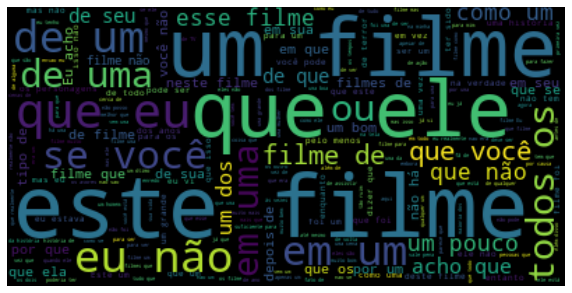

In [20]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavra, interpolation='bilinear')
plt.axis('off')
plt.show()

In [0]:
#Segregando entre negativo e positivo
def nuvem_palavras(resenha, sentimento, coluna):
  resenha_sentimento = resenha.query("sentiment ==  '%s'" %sentimento )
  todas_palavras = ' '.join([texto for texto in resenha_sentimento[coluna]])
  nuvem_palavra = WordCloud(width=800, 
                            height=500, 
                            max_font_size=110,
                            collocations = False
                            ).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavra, interpolation='bilinear')
  plt.axis('off')
  plt.show()

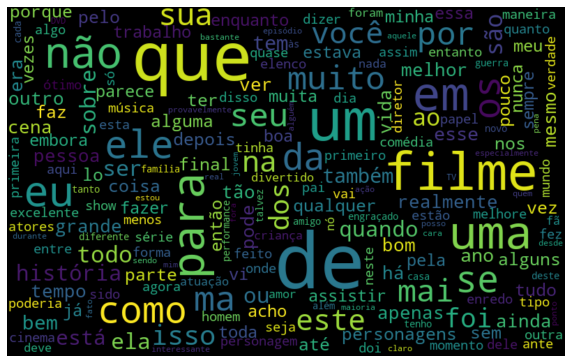

In [65]:
nuvem_palavras(resenha, "pos", "text_pt")

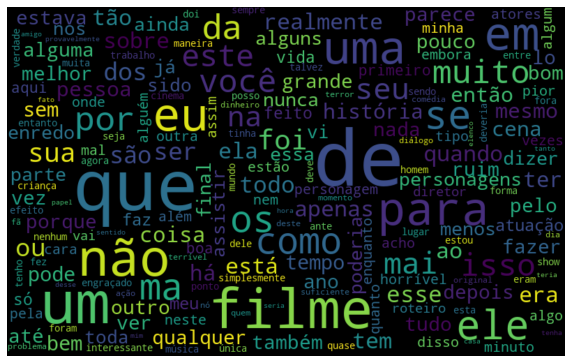

In [66]:
nuvem_palavras(resenha, "neg", "text_pt")

In [0]:
#separa as palavras e conta as frequencia
import nltk
from nltk import tokenize

In [0]:
token_espaco = tokenize.WhitespaceTokenizer()
frases_token = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(frases_token)
df_frequencia = pd.DataFrame({"Palavras": list(frequencia.keys()),
                             "Frequencia":list(frequencia.values())})

In [26]:
#temos um dataframe com as 10 primeiras palavras mais frequentes
top10 = df_frequencia.nlargest(columns='Frequencia', n=10)
top10

,Palavras,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


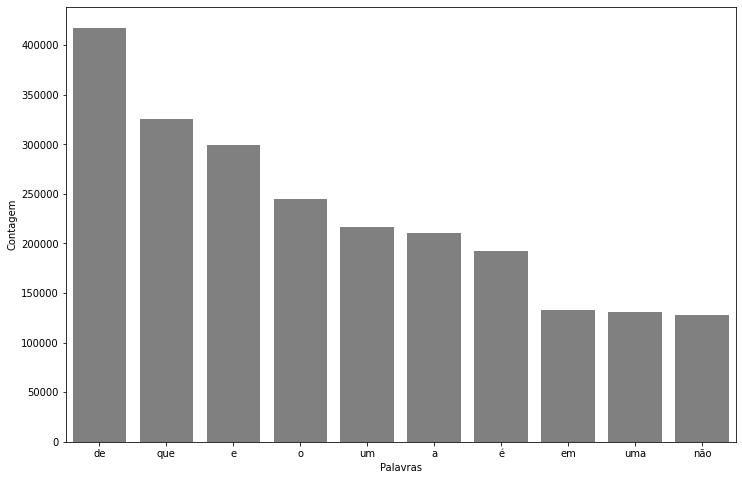

In [27]:
#Grafico de pareto usando seaborn
import seaborn as sns

#tamanho
plt.figure(figsize=(12,8))

#crair um objeto com os dados, para ser transformado em imagem
ax = sns.barplot(data = top10, x='Palavras', y='Frequencia', color='gray')
#legendas
ax.set(ylabel = 'Contagem')
#execucao
plt.show()

Stop Words - removendo o que não agrega

In [28]:
#importar os corpus de palavras
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [0]:
#remover os stopwords 
frase_processada = list()
 
for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)

  frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada

In [31]:
print("frase_processada: ", len(frase_processada))
resenha.head()

frase_processada:  49459


,id,text_pt,sentiment,classificacao,tratamento_1
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [32]:
#remover outra maneira usando JOIN
print("todas as palavras: ", len(frases_token), type(frases_token))
print("stopwords: ", len(palavras_irrelevantes), type(frases_token))

df_todas_palavras = pd.DataFrame({"aaa": frases_token})
print("df_todas_palavras: ", len(df_todas_palavras), type(df_todas_palavras))

df_palavras_irrelevantes = pd.DataFrame({"aaa": palavras_irrelevantes})
print("df_palavras_irrelevantes: ", len(df_palavras_irrelevantes), type(df_palavras_irrelevantes))

palavras_processada = df_todas_palavras.merge(df_palavras_irrelevantes, indicator='i', how='outer').query('i == "left_only"').drop('i', 1)
print("palavras processada: ", len(palavras_processada))

#de 10.917.477 palavra vamos
#remover 204 stopword e assim ficamos 
#com 6.528.415 palavra limpas

todas as palavras:  10917477 <class 'list'>
stopwords:  204 <class 'list'>
df_todas_palavras:  10917477 <class 'pandas.core.frame.DataFrame'>
df_palavras_irrelevantes:  204 <class 'pandas.core.frame.DataFrame'>
palavras processada:  6528415


Retirando pontuação do dataset


In [33]:
from string import punctuation
pontuacao = list(punctuation)
print(pontuacao)

#juntar com a lista de stop word
pontuacao_stopword = pontuacao + palavras_irrelevantes
print(pontuacao_stopword)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', '

In [0]:
#separa o texto por tuação tbm nao so por espaço
tokenize_pontuacao = tokenize.WordPunctTokenizer()

In [0]:
#2 tratamento remover pontuacao
frase_processada = list()

for opniao in resenha['tratamento_1']:
  nova_frase = list()
  palavra_texto = tokenize_pontuacao.tokenize(opniao)
  for palavra in palavra_texto:
    if palavra not in pontuacao_stopword:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_2"] = frase_processada

In [49]:
resenha.head()

,id,text_pt,sentiment,classificacao,tratamento_1,tratamento2
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [0]:
#funcao pareto
def pareto(resenha, coluna, quantidade):
  todas_frases = ' '.join([texto for texto in resenha[coluna]])
  todas_palavras = tokenize.WordPunctTokenizer().tokenize(todas_frases)
  frequencia = nltk.FreqDist(todas_palavras)
  df_frequencia = pd.DataFrame({"Palavras": list(frequencia.keys()),
                              "Frequencia":list(frequencia.values())})
  top10 = df_frequencia.nlargest(columns='Frequencia', n=quantidade)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = top10, x='Palavras', y='Frequencia', color='gray')
  ax.set(ylabel = 'Contagem')
  plt.show()

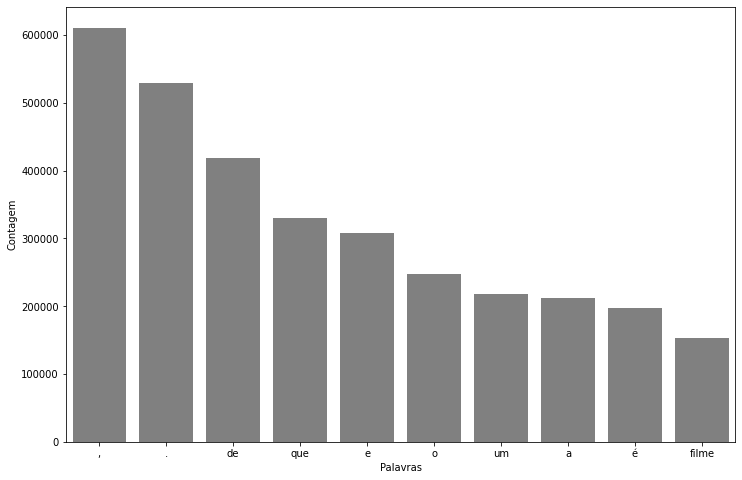

In [51]:
pareto(resenha, "text_pt", 10)

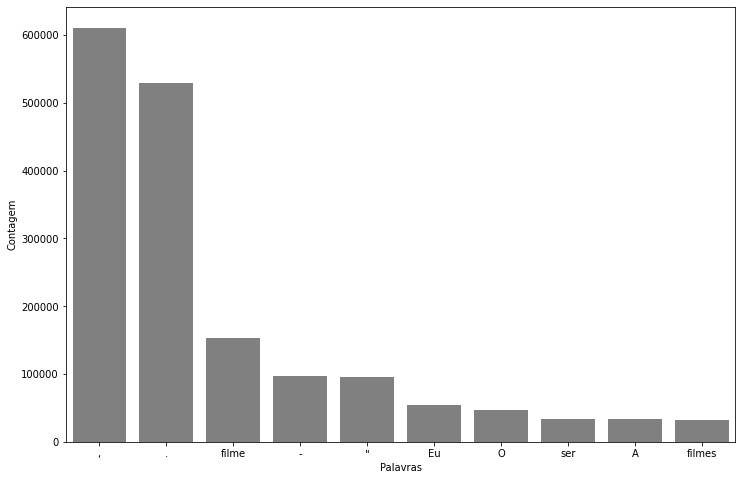

In [52]:
pareto(resenha, "tratamento_1", 10)

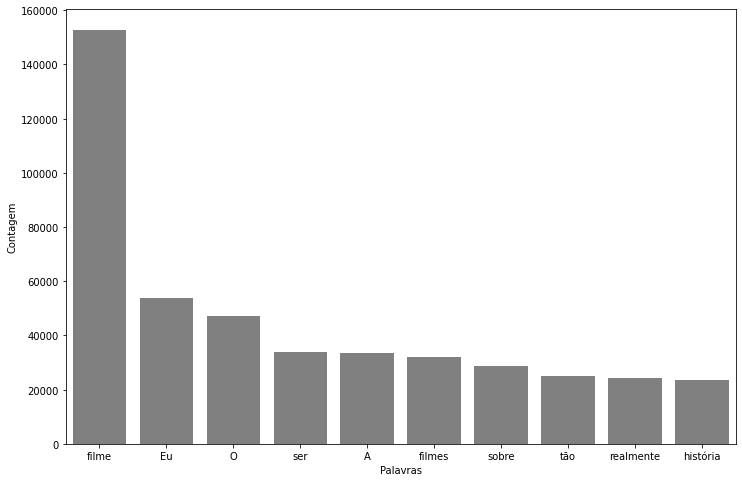

In [55]:
pareto(resenha, "tratamento_2", 10)

In [56]:
#Retirando acentuação
!pip install Unidecode
from unidecode import unidecode

     |████████████████████████████████| 245kB 2.8MB/s 


In [57]:
frases_sem_acento = [unidecode(texto) for texto in resenha["tratamento_2"]]
frases_sem_acento[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [60]:
pontuacao_stopword_sem_acentos = [unidecode(texto) for texto in pontuacao_stopword]
print(pontuacao_stopword_sem_acentos)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'de', 'a', 'o', 'que', 'e', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estive

In [0]:
#remover novamente as stopword sem acento
resenha["tratamento_3"] = frases_sem_acento

frase_processada = list()

for opniao in resenha['tratamento_3']:
  nova_frase = list()
  palavra_texto = tokenize_pontuacao.tokenize(opniao)
  for palavra in palavra_texto:
    if palavra not in pontuacao_stopword_sem_acentos:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_3"] = frase_processada

In [62]:
resenha.head()

,id,text_pt,sentiment,classificacao,tratamento_1,tratamento2,tratamento_2,tratamento_3
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


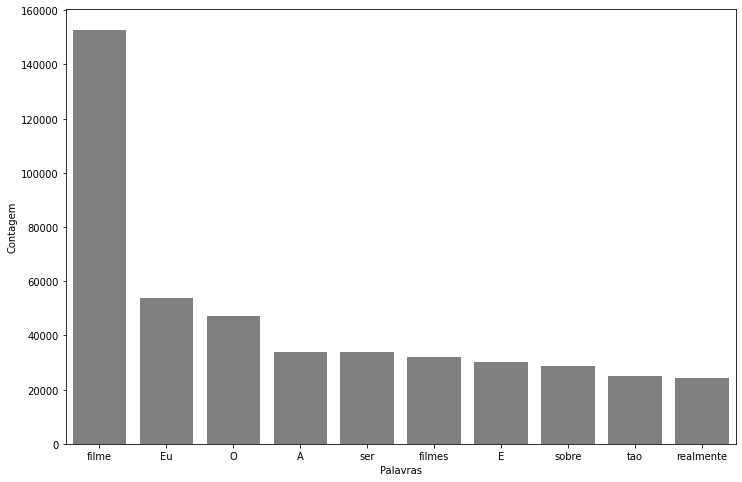

In [63]:
pareto(resenha, "tratamento_3", 10)

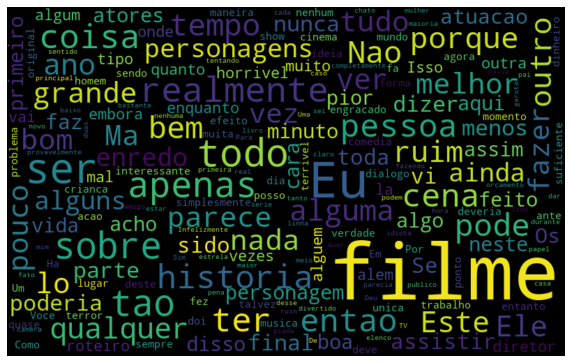

In [67]:
nuvem_palavras(resenha, "neg", "tratamento_3")

In [68]:
classificacao_texto(resenha,'tratamento_3', 'classificacao')

0.7087747674888799

In [0]:
#Transformando em minúsculo
frase_processada = list()
for opniao in resenha['tratamento_3']:
  nova_frase = list()
  opniao = opniao.lower()
  palavra_texto = tokenize_pontuacao.tokenize(opniao)
  for palavra in palavra_texto:
    if palavra not in pontuacao_stopword_sem_acentos:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_4"] = frase_processada

In [73]:
resenha.head()

,id,text_pt,sentiment,classificacao,tratamento_1,tratamento2,tratamento_2,tratamento_3,tratamento_4
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


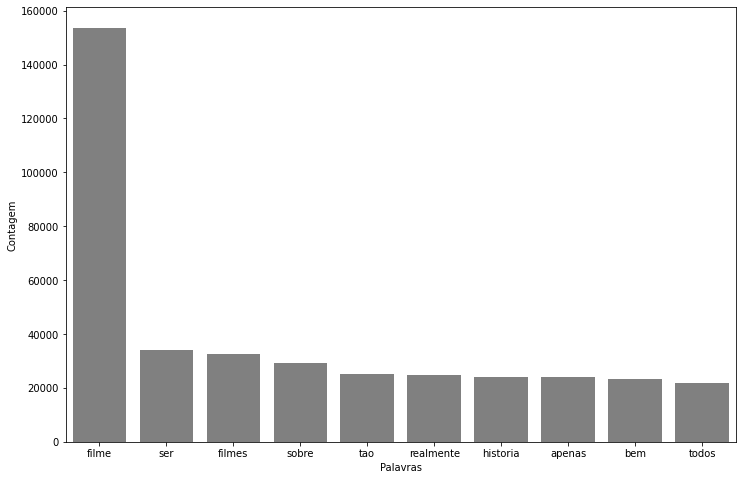

In [74]:
pareto(resenha, "tratamento_4", 10)

In [75]:
classificacao_texto(resenha,'tratamento_4', 'classificacao')

0.7106348564496563

In [78]:
#stemização
import nltk
nltk.download('rslp')
stemmer = nltk.RSLPStemmer()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [0]:
#stemmer
frase_processada = list()
for opniao in resenha['tratamento_4']:
  nova_frase = list()
  palavra_texto = tokenize_pontuacao.tokenize(opniao)
  for palavra in palavra_texto:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_5"] = frase_processada

In [83]:
classificacao_texto(resenha,'tratamento_5', 'classificacao')

0.7458147998382532

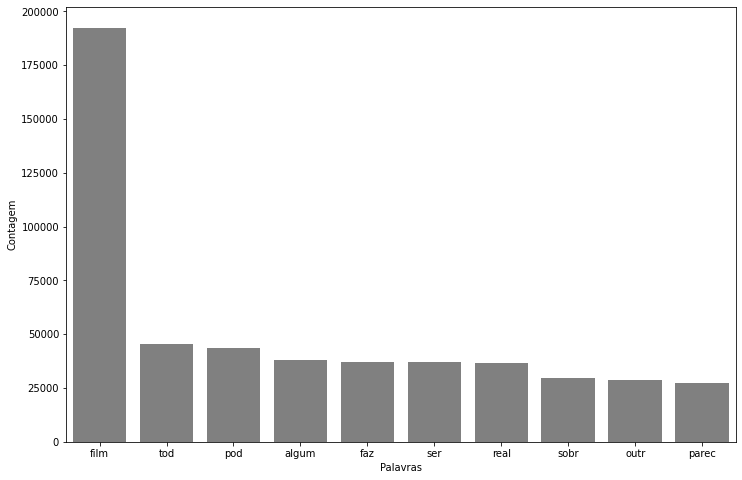

In [84]:
pareto(resenha, "tratamento_5", 10)